## Anomaly Detection in West Texas Intermediate (WTI) Crude Oil Prices using Autoencoders

### The Anomaly Detection in West Texas Intermediate (WTI) Crude Oil Prices has a Real-World Application:

The ability to detect anomalies in crude oil prices has practical application  in the financial and energy sectors. Detecting abnormal price movements early can help to make informed decisions and mitigate potential risks.

### It is important to consider the following:
### * March 8, 2020 a price conflict begins between Saudi Arabia and Russia, and the starting of the coronavirus pandemic around the world
### * WTI on April 20, 2020 prices fell below zero for the first time in history

(Source: Wikipedia)

### This makes this case of study very attractive with a direct impact and different implications. First, it is easy to evaluate the performance of our model based on the anomaly detection of the two catastrophic scenarios of the Spring of 2020 in the WTI Oil Prices. And second,  by incorporating anomaly detection techniques, financial and energy market participants can enhance their risk management  and decision making strategies.

In [76]:
# Import libraries

import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import yfinance as yf


import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, LSTM, Dropout, RepeatVector, TimeDistributed, Dense


In [77]:
# Fetch historical data for West Texas Intermediate (WTI) crude oil prices
df = yf.download("CL=F", period="max")[['Close']].reset_index()


[*********************100%%**********************]  1 of 1 completed


In [78]:
df.head()

,Date,Close
0,2000-08-23,32.049999
1,2000-08-24,31.629999
2,2000-08-25,32.049999
3,2000-08-28,32.869999
4,2000-08-29,32.720001


In [79]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], name='Close price'))
fig.update_layout(showlegend=True, title='WTI Oil Price 2000-2024')
fig.show()

In [80]:
# Identifying the shape of the data
df.shape

(5935, 2)

In [81]:
# Are there any duplicates
df.duplicated().sum().any()

False

In [82]:
# Checking for True or False for any nulls in the dataset
df.isnull().values.any()

False

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5935 entries, 0 to 5934
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5935 non-null   datetime64[ns]
 1   Close   5935 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 92.9 KB


In [84]:
# Preprocessing
#Train test split
train, test = df.loc[df['Date'] <= '2020-01-01'], df.loc[df['Date'] > '2020-01-01']

train.shape, test.shape


((4857, 2), (1078, 2))

In [85]:
# Scaling
scaler = StandardScaler()
train['Close'] = scaler.fit_transform(train[['Close']])
test['Close'] = scaler.transform(test[['Close']])


<ipython-input-85-0b756a53dc53>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-85-0b756a53dc53>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
# Create sequences for the LSTM
sequence_length = 30
X_train = np.array([train['Close'].values[i:i+sequence_length] for i in range(len(train) - sequence_length)])
X_test = np.array([test['Close'].values[i:i+sequence_length] for i in range(len(test) - sequence_length)])


In [87]:
# Define and compile the model
model = keras.models.Sequential([
    keras.layers.LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(32, activation='relu', return_sequences=False),
    keras.layers.Dropout(0.2),
    keras.layers.RepeatVector(sequence_length),
    keras.layers.LSTM(32, activation='relu', return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(64, activation='relu', return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.TimeDistributed(keras.layers.Dense(1))
])

model.compile(optimizer='adam', loss='mse')

In [88]:

# Train the model
history = model.fit(X_train, X_train, epochs=100, batch_size=32, validation_data=(X_test, X_test))


Epoch 1/100
151/151 [==============================] - 10s 40ms/step - loss: 23.5239 - val_loss: 0.2907
Epoch 2/100
151/151 [==============================] - 5s 35ms/step - loss: 0.2447 - val_loss: 0.1276
Epoch 3/100
151/151 [==============================] - 5s 35ms/step - loss: 0.1342 - val_loss: 0.0823
Epoch 4/100
151/151 [==============================] - 5s 35ms/step - loss: 0.0973 - val_loss: 0.0695
Epoch 5/100
151/151 [==============================] - 5s 35ms/step - loss: 0.0785 - val_loss: 0.0594
Epoch 6/100
151/151 [==============================] - 6s 39ms/step - loss: 0.0694 - val_loss: 0.0520
Epoch 7/100
151/151 [==============================] - 6s 41ms/step - loss: 0.0605 - val_loss: 0.0482
Epoch 8/100
151/151 [==============================] - 5s 35ms/step - loss: 0.0556 - val_loss: 0.0467
Epoch 9/100
151/151 [==============================] - 5s 36ms/step - loss: 0.0499 - val_loss: 0.0432
Epoch 10/100
151/151 [==============================] - 5s 35ms/step - loss: 0.0

151/151 [==============================] - 6s 38ms/step - loss: 0.0189 - val_loss: 0.0279
Epoch 81/100
151/151 [==============================] - 6s 38ms/step - loss: 0.0194 - val_loss: 0.0278
Epoch 82/100
151/151 [==============================] - 6s 37ms/step - loss: 0.0186 - val_loss: 0.0290
Epoch 83/100
151/151 [==============================] - 6s 37ms/step - loss: 0.0188 - val_loss: 0.0383
Epoch 84/100
151/151 [==============================] - 6s 39ms/step - loss: 0.0185 - val_loss: 0.0267
Epoch 85/100
151/151 [==============================] - 6s 42ms/step - loss: 0.0182 - val_loss: 0.0283
Epoch 86/100
151/151 [==============================] - 6s 37ms/step - loss: 0.0179 - val_loss: 0.0242
Epoch 87/100
151/151 [==============================] - 6s 38ms/step - loss: 0.0179 - val_loss: 0.0320
Epoch 88/100
151/151 [==============================] - 6s 38ms/step - loss: 0.0179 - val_loss: 0.0262
Epoch 89/100
151/151 [==============================] - 6s 38ms/step - loss: 0.0181 - 

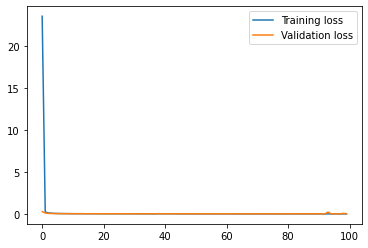

In [89]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [118]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

33/33 [==============================] - 0s 8ms/step


In [119]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE) for training set
train_mae = np.mean(np.abs(train_predictions.reshape(train_predictions.shape[0], -1) - X_train), axis=1)

# Calculate Mean Absolute Error (MAE) for test set
test_mae = np.mean(np.abs(test_predictions.reshape(test_predictions.shape[0], -1) - X_test), axis=1)

# Print the mean absolute errors
print(f'Mean Absolute Error (MAE) for training set: {np.mean(train_mae)}')
print(f'Mean Absolute Error (MAE) for test set: {np.mean(test_mae)}')



Mean Absolute Error (MAE) for training set: 0.1128388090526101
Mean Absolute Error (MAE) for test set: 0.12465762841776702


#### The MAE values for the training and test sets are quite close, it suggests that the model is not overfitting.
#### This indicates that the model is generalizing well to unseen data and is performing consistently on both the 
#### training and test sets.

In [131]:
# Calculate reconstruction error
train_mse = np.mean(np.square(train_predictions.reshape(train_predictions.shape[0], -1) - X_train), axis=1)
test_mse = np.mean(np.square(test_predictions.reshape(test_predictions.shape[0], -1) - X_test), axis=1)


In [132]:
# Concatenate data for anomaly detection visualization
full_data = np.concatenate([train['Close'], test['Close']])
full_mse = np.concatenate([train_mse, test_mse])


In [133]:
# Set threshold for anomaly detection
threshold = np.mean(full_mse) + 2 * np.std(full_mse)
threshold

0.06416541563138323

In [134]:
# Identify anomalies
anomalies = np.where(full_mse > threshold, 1, 0)


In [135]:
# Ensure lengths match
min_length = min(len(full_dates), len(full_close_prices), len(anomalies))
full_dates = full_dates[:min_length]
full_close_prices = full_close_prices[:min_length]
anomalies = anomalies[:min_length]

# Create a DataFrame with all dates, close prices, and anomalies
anomalies_df = pd.DataFrame({'Date': full_dates, 'Close': full_close_prices, 'Anomaly': anomalies})

# Filter anomalies to get the detected anomalies
detected_anomalies = anomalies_df[anomalies_df['Anomaly'] == 1]

# Print the number of detected anomalies
print(f'Number of detected anomalies: {len(detected_anomalies)}')

# Print the detected anomalies
print(detected_anomalies)


Number of detected anomalies: 139
           Date       Close  Anomaly
1883 2008-04-21  117.480003        1
1885 2008-04-23  118.300003        1
1953 2008-07-30  126.769997        1
1954 2008-07-31  124.080002        1
1955 2008-08-01  125.099998        1
...         ...         ...      ...
5380 2022-03-14  103.010002        1
5381 2022-03-15   96.440002        1
5382 2022-03-16   95.040001        1
5383 2022-03-17  102.980003        1
5384 2022-03-18  104.699997        1

[139 rows x 3 columns]


In [136]:
# Visualize anomalies
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=full_data, name='Close Price'))
fig.add_trace(go.Scatter(x=df['Date'][sequence_length:], y=full_mse, mode='lines', name='Reconstruction Error'))
fig.add_trace(go.Scatter(x=df['Date'][sequence_length:], y=np.where(anomalies, full_mse, None), mode='markers', name='Anomalies', marker=dict(color='red', size=8)))
fig.update_layout(title='Anomaly Detection using LSTM Autoencoder',
                   xaxis_title='Date',
                   yaxis_title='Value')
fig.show()


In [137]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add the close price data
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close price'))

# Add markers for anomalies
anomalies_dates = detected_anomalies['Date']
anomalies_prices = detected_anomalies['Close']
fig.add_trace(go.Scatter(x=anomalies_dates, y=anomalies_prices, mode='markers', name='Anomaly', marker=dict(color='red', size=8)))

# Update layout
fig.update_layout(showlegend=True, title='WTI Oil Price 2000-2024')

# Show plot
fig.show()



#### Visualize the reconstruction errors or reconstructed data to get a qualitative understanding of how well the model is performing. Look for patterns or anomalies in the reconstructed data.

## Conclusions

### The LSTM autoencoder model was able to effectively detect anomalies in the WTI crude oil price data. The model detected anomalies related to low prices in the period of March and April 2020. It is important to highligh that corresponds to the following:


### * The price of WTI oil hit an all-time high in July 2008. However, the price began to fall sharply due to the global economic slowdown and the 2008 financial crisis in general, with a drastic decline in the price of WTI oil in late 2008.

(Source: New York Post)



### * March 8, 2020 a price conflict begins between Saudi Arabia and Russia, and the starting of the coronavirus pandemic around the world
### * WTI on April 20, 2020 prices fell below zero for the first time in history

(Source: The New York Times)




### * January 2022, the WTI reached 84 USD and is at its highest price in more than seven years

(Source: EFE)


###    While the LSTM autoencoder model showed promising results, there is always room for improvement. Fine-tuning the model architecture, exploring different hyperparameters, and incorporating additional features could enhance the model's performance and accuracy in anomaly detection.

In [140]:
# Save the model
model.save('anomaly_detection_LTSM_autoencoder_model.h5')